In [1]:
#Imports

from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read CSV

train_data = pd.read_csv("dataset/train_data_cleaned.csv")
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [3]:
#Drop columns not needed

train_data_drop = train_data.drop(['customer_id', 'name'], axis=1)
train_data_drop

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0.0,107934.04,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0.0,109862.62,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0.0,230153.17,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0.0,122325.82,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0.0,387286.00,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,F,N,N,2.0,96207.57,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
43504,31,F,N,Y,0.0,383476.74,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
43505,27,F,N,Y,0.0,260052.18,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
43506,32,M,Y,N,0.0,157363.04,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


In [4]:
#Use get dummies to assign values to strings

train_data_clean = pd.get_dummies(train_data_drop, columns=['gender', 'owns_car', 'owns_house',
       'occupation_type'], drop_first=True)

train_data_clean

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,2.0,96207.57,4.0,0.0,11229.54,29663.83,82,907.0,0,...,0,0,0,0,0,0,0,0,1,0
43504,31,0.0,383476.74,2.0,1.0,43369.91,139947.16,32,679.0,0,...,0,0,0,0,0,0,0,0,0,0
43505,27,0.0,260052.18,2.0,0.0,22707.51,83961.83,46,727.0,0,...,0,0,0,0,0,0,0,0,0,0
43506,32,0.0,157363.04,2.0,0.0,20150.10,25538.72,92,805.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = train_data_clean["credit_card_default"]
target_names = ["no", "yes"]


In [6]:
train_data_df = train_data_clean.drop("credit_card_default", axis=1)

feature_names = train_data_df.columns
train_data_df

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,2.0,96207.57,4.0,0.0,11229.54,29663.83,82,907.0,0,...,0,0,0,0,0,0,0,0,1,0
43504,31,0.0,383476.74,2.0,1.0,43369.91,139947.16,32,679.0,0,...,0,0,0,0,0,0,0,0,0,0
43505,27,0.0,260052.18,2.0,0.0,22707.51,83961.83,46,727.0,0,...,0,0,0,0,0,0,0,0,0,0
43506,32,0.0,157363.04,2.0,0.0,20150.10,25538.72,92,805.0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_df, target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9726027397260274

In [11]:
feature_names1 = train_data_df.columns

target = train_data_clean["credit_card_default"]
target_names1 = ["no", "yes"]


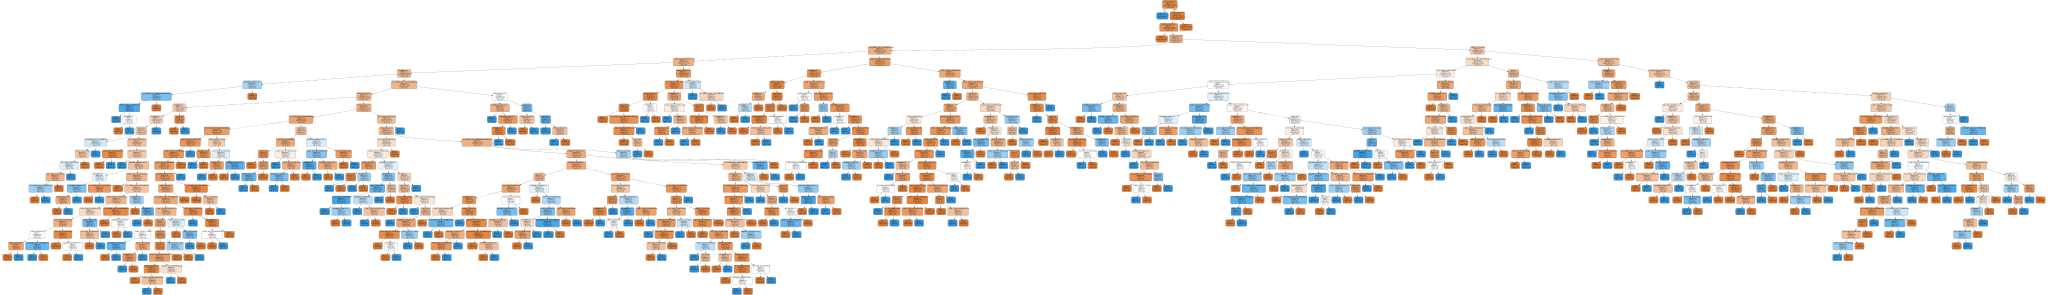

In [12]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names1,  
    class_names=target_names1,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('credit.png')

graph = graphviz.Source(dot_data)  
graph 

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9811528914222671

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.39120029395717804, 'credit_score'),
 (0.20136977153840274, 'prev_defaults'),
 (0.17952576448944005, 'default_in_last_6months'),
 (0.07501888547338455, 'credit_limit_used(%)'),
 (0.028820450390823798, 'yearly_debt_payments'),
 (0.028737769453510066, 'credit_limit'),
 (0.028531354073807025, 'net_yearly_income'),
 (0.021776164420864472, 'age'),
 (0.007702529161417817, 'total_family_members'),
 (0.005238098752352946, 'no_of_children'),
 (0.004149040300478974, 'owns_house_Y'),
 (0.0039399824722397055, 'owns_car_Y'),
 (0.003464105672650287, 'gender_M'),
 (0.003080372801129614, 'migrant_worker'),
 (0.0022993805050586956, 'occupation_type_Laborers'),
 (0.0021932288305626956, 'occupation_type_Unknown'),
 (0.0018819830613463482, 'occupation_type_Sales staff'),
 (0.0015696709574350022, 'occupation_type_Core staff'),
 (0.0015400784101687974, 'occupation_type_Drivers'),
 (0.001481255872425488, 'occupation_type_Managers'),
 (0.0010828064838977662, 'occupation_type_Cooking staff'),
 (0.0010471159

<AxesSubplot:>

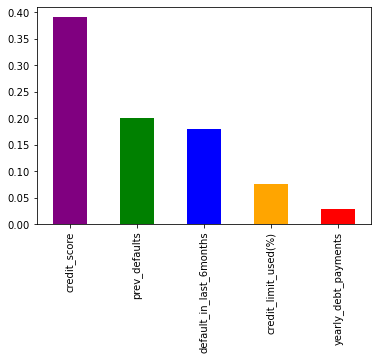

In [24]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='bar', color=['purple', 'green', 'blue', 'orange', 'red'])


In [36]:
#Save the model - decision tree
import joblib

filename= 'saved_models/decision_tree_trained.joblib'
joblib.dump(clf, filename)

['saved_models/decision_tree_trained.joblib']

In [37]:
#Save the model - random forest
import joblib

filename1= 'saved_models/random_forest_trained.joblib'
joblib.dump(rf, filename1)

['saved_models/random_forest_trained.joblib']

In [38]:
#Load the model - decision tree
loaded_model = joblib.load(filename)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))

Test Acc: 0.973


In [39]:
#Load the model - random forest
loaded_model = joblib.load(filename1)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))

Test Acc: 0.981
